In [1]:
import tensorflow as tf # type: ignore
from tensorflow.keras.datasets import mnist # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt # type: ignore

In [2]:
#load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
print(y_test)

[7 2 1 ... 4 5 6]


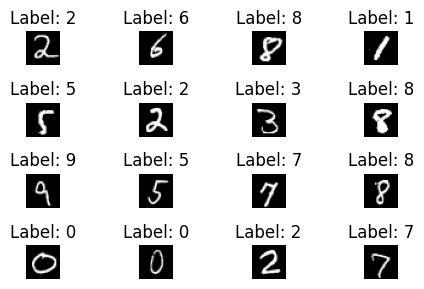

In [6]:
#Displaying sample images from MNIST dataset
#select random indices for displaying images
import numpy as np # type: ignore
indices = np.random.randint(0, x_train.shape[0], size = 16)

#create a fig and subplots
fig, axes = plt.subplots(4, 4, figsize=[5, 3])

#flatten the axes array for easy iteration
axes = axes.flatten()

for i,ax in enumerate(axes):
    image = x_train[indices[i]]
    label = y_train[indices[i]]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
    
plt.tight_layout()
plt.show()

In [10]:
#reshape data for cnn input
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows,img_cols,1)

In [ ]:
'''purpose of reshaping
--------------------------
is to transform data into 4d array, which is the std format for img dta in CNN. 
the dimension represent: 
no of samples - tot no of img in dataset
img height - height of each img in pixels
img width - width of each img in pixels
no of channels - no of color channels in img

'''

'purpose of reshaping\nis to transform data into 4d array, which is the std format for img dta in CNN. \nthe dimension represent: \nno of samples - tot no of img in dataset\nimg height - height of each img in pixels\nimg width - width of each img in pixels\nno of channels - no of color channels in img\n\n'

In [ ]:
#x_test.shape
x_train.shape

(60000, 28, 28, 1)

In [ ]:
#normalize pixel values to bw 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [14]:
#convert class vectors to binary class matrices
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [15]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
#creat a cnn model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

C:\Users\KH.EN.P2MCA24006\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
#compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.8750 - loss: 0.4466 - val_accuracy: 0.9753 - val_loss: 0.0821
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9788 - loss: 0.0694 - val_accuracy: 0.9831 - val_loss: 0.0538
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9860 - loss: 0.0481 - val_accuracy: 0.9819 - val_loss: 0.0557
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9899 - loss: 0.0340 - val_accuracy: 0.9848 - val_loss: 0.0462
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9934 - loss: 0.0234 - val_accuracy: 0.9833 - val_loss: 0.0495
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - accuracy: 0.9946 - loss: 0.0183 - val_accuracy: 0.9863 - val_loss: 0.0414
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9960 - loss: 0.0145 - val_accuracy: 0.9871 - val_loss: 0.0395
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9973 - loss: 0.0099 - 

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,081,888 (7.94 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,387,926 (5.29 MB)